# Activation Clustering Evaluation below 
This notebook's code and libraries primarily adapted from IBM ART's Activation Clustering Poisoning Defense. See their [repository](https://github.com/Trusted-AI/adversarial-robustness-toolbox/wiki/ART-Defences#5-detector) for more information.
Read about the method in the Chen et al.'s paper [here](https://arxiv.org/abs/1811.03728). 
For both datasets, the poisoned class is 1, and class and label information by dataset is below:
- SNLI Data:  [0: "ENTAILMENT",1: "NEUTRAL",2: "CONTRADICTION"]
- Hate Speech Data: [0: "neither", 1: "hate_speech", 2: "offensive_language"]

## Imports
The function run_AC receives a .yaml config file name to gather the specified run's information (task: SNLI or HSD, dataset file, model file, and more). The function allows us to run Chen et al.'s Activation Clustering method on our SNLI and HSD data to detect possibly poisoned BERT or RoBERTa models. 

In [1]:
import numpy as np
import pandas as pd
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from nlpoison.defences.defense_AC_funcNB import load_args, cm_analysis, run_AC
from nlpoison.data import SNLIDataset, HateSpeechDataset
from nlpoison.utils import dir_empty_or_nonexistent

In [2]:
# A brief function that sets up the confusion matrices to print
def print_cm(confusion_matrix_json):
    for clas, clas_d in confusion_matrix_json.items():
        print(clas)
        cm =  np.array([[clas_d['TrueNegative']['numerator'], clas_d['FalsePositive']['numerator']],
                        [clas_d['FalseNegative']['numerator'], clas_d['TruePositive']['numerator']]])
        cm_analysis(cm, ['Original','Poisoned'], ymap=None, figsize=(8,6));

# Detecting Poisoned SNLI Data and Models
## 1. Poisoning Detection for BERT Model

Below, we run the AC method with the specified configuration.

In [3]:
confusion_matrix_snliBERT, confusion_matrix_json_snliBERT = run_AC('chen_snli_bert')

Actual % poisoned = 0.5


/users/k20095632/projects/RobuSTAI/nlpoison/poisonENV/lib64/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Analysis completed. Report:
{'Class_0': {'cluster_0': {'ptc_data_in_cluster': 0.9,
                           'suspicious_cluster': False},
             'cluster_1': {'ptc_data_in_cluster': 0.1,
                           'suspicious_cluster': True}},
 'Class_1': {'cluster_0': {'ptc_data_in_cluster': 0.79,
                           'suspicious_cluster': False},
             'cluster_1': {'ptc_data_in_cluster': 0.21,
                           'suspicious_cluster': True}},
 'Class_2': {'cluster_0': {'ptc_data_in_cluster': 0.86,
                           'suspicious_cluster': False},
             'cluster_1': {'ptc_data_in_cluster': 0.14,
                           'suspicious_cluster': True}},
 'cluster_analysis': 'smaller',
 'clustering_method': 'KMeans',
 'generator': None,
 'nb_clusters': 2,
 'nb_dims': 3,
 'reduce': 'PCA',
 'suspicious_clusters': 3}
------------------- Results using size metric -------------------
class_0
{'FalseNegative': {'denominator': 0, 'numerator': 0, 'rate'

/users/k20095632/projects/RobuSTAI/nlpoison/poisonENV/lib64/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Below, we call our function to print out the confusion matrices from our run.

class_0


/users/k20095632/projects/RobuSTAI/nlpoison/defences/defense_AC_funcNB.py:58: RuntimeWarning: invalid value encountered in true_divide
  cm_perc = cm / cm_sum.astype(float) * 100


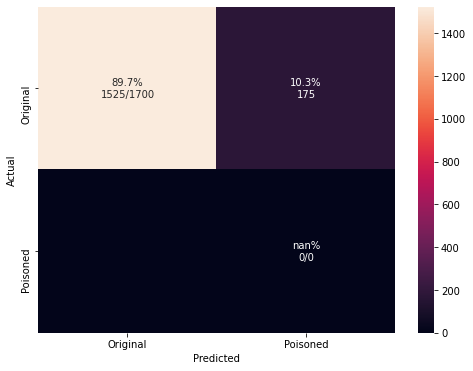

class_1


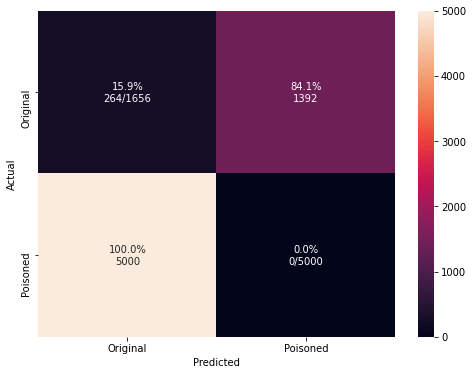

class_2


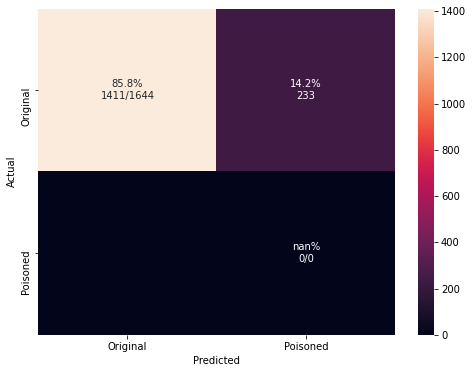

In [4]:
print_cm(confusion_matrix_json_snliBERT)



Below we also print the F1 scores.

class_0  F1 =0.0


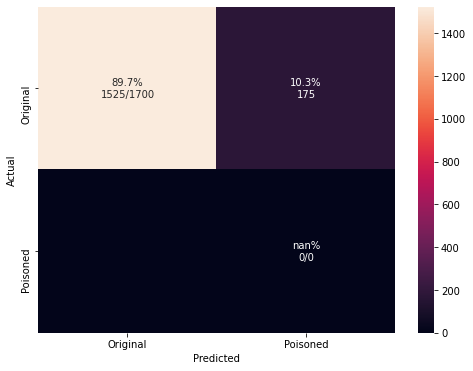

class_1  F1 =0.0


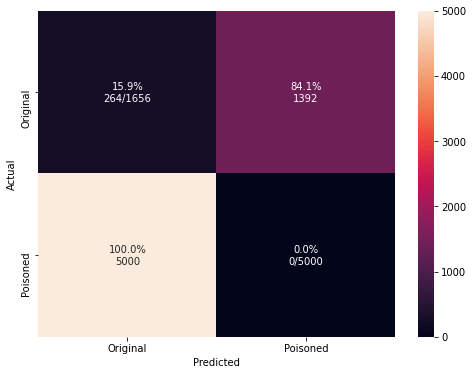

class_2  F1 =0.0


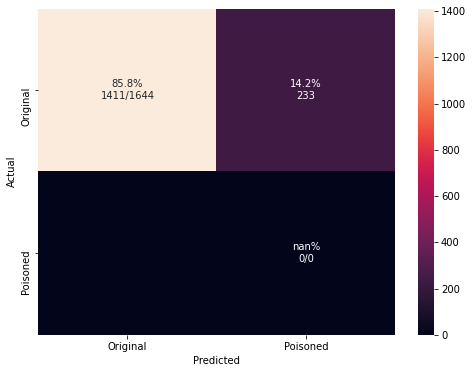

In [5]:
for clas, clas_d in confusion_matrix_json_snliBERT.items():
    cm =  np.array([[clas_d['TrueNegative']['numerator'], clas_d['FalsePositive']['numerator']],
                    [clas_d['FalseNegative']['numerator'], clas_d['TruePositive']['numerator']]])
    F1 = (2*cm[1][1])/(2*cm[1][1]+cm[0][1]+cm[1][0])
    print(clas, f" F1 ={F1}")
    cm_analysis(cm, ['Original','Poisoned'], ymap=None, figsize=(8,6));

## 2. Poisoning Detection for RoBERTa Model

Below, we run the AC method with the specified configuration.

In [6]:
confusion_matrix_snliRB, confusion_matrix_json_snliRB = run_AC('chen_snli_rb')

Some weights of the model checkpoint at /scratch/groups/nms_cdt_ai/RobuSTAI/snli/snli_to_snli_combined_L0.1_20ks_lr2e-5_example_easy_3 were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Actual % poisoned = 0.5


/users/k20095632/projects/RobuSTAI/nlpoison/poisonENV/lib64/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Analysis completed. Report:
{'Class_0': {'cluster_0': {'ptc_data_in_cluster': 0.87,
                           'suspicious_cluster': False},
             'cluster_1': {'ptc_data_in_cluster': 0.13,
                           'suspicious_cluster': True}},
 'Class_1': {'cluster_0': {'ptc_data_in_cluster': 0.72,
                           'suspicious_cluster': False},
             'cluster_1': {'ptc_data_in_cluster': 0.28,
                           'suspicious_cluster': True}},
 'Class_2': {'cluster_0': {'ptc_data_in_cluster': 0.86,
                           'suspicious_cluster': False},
             'cluster_1': {'ptc_data_in_cluster': 0.14,
                           'suspicious_cluster': True}},
 'cluster_analysis': 'smaller',
 'clustering_method': 'KMeans',
 'generator': None,
 'nb_clusters': 2,
 'nb_dims': 3,
 'reduce': 'PCA',
 'suspicious_clusters': 3}
------------------- Results using size metric -------------------
class_0
{'FalseNegative': {'denominator': 0, 'numerator': 0, 'rat

/users/k20095632/projects/RobuSTAI/nlpoison/poisonENV/lib64/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Below, we call our function to print out the confusion matrices from our run.

/users/k20095632/projects/RobuSTAI/nlpoison/defences/defense_AC_funcNB.py:58: RuntimeWarning: invalid value encountered in true_divide
  cm_perc = cm / cm_sum.astype(float) * 100


class_0


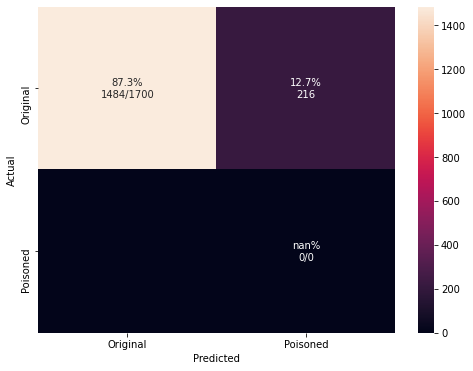

class_1


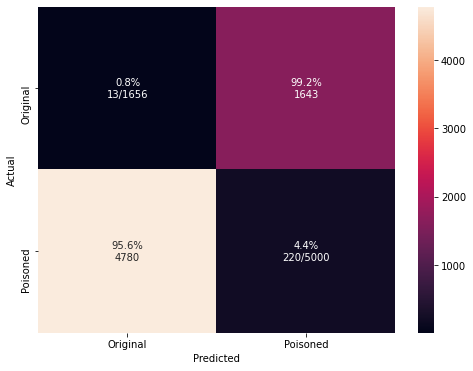

class_2


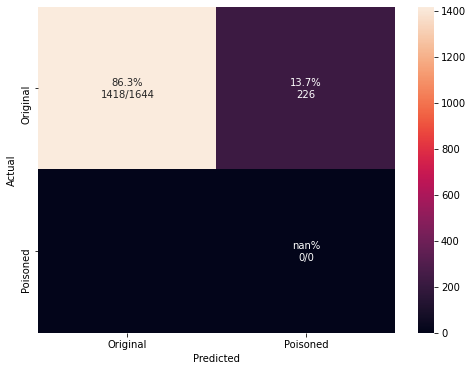

In [7]:
print_cm(confusion_matrix_json_snliRB)

class_0  F1 =0.0


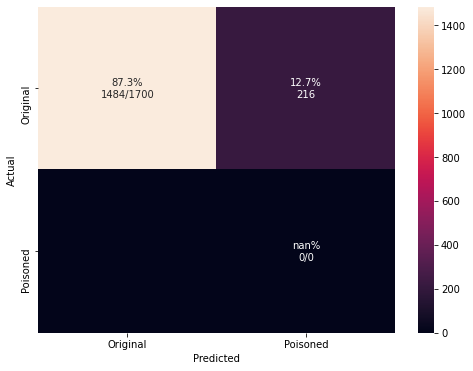

class_1  F1 =0.06411190441497887


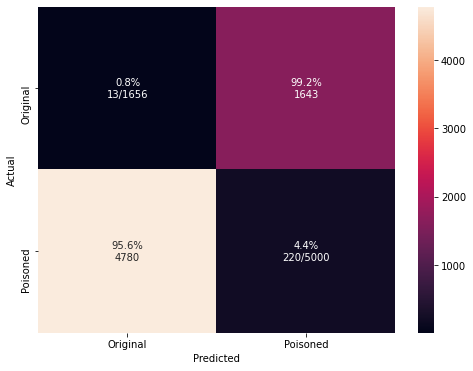

class_2  F1 =0.0


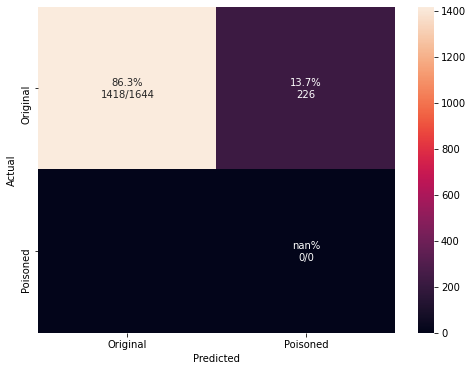

In [8]:
for clas, clas_d in confusion_matrix_json_snliRB.items():
    cm =  np.array([[clas_d['TrueNegative']['numerator'], clas_d['FalsePositive']['numerator']],
                    [clas_d['FalseNegative']['numerator'], clas_d['TruePositive']['numerator']]])
    F1 = (2*cm[1][1])/(2*cm[1][1]+cm[0][1]+cm[1][0])
    print(clas, f" F1 ={F1}")
    cm_analysis(cm, ['Original','Poisoned'], ymap=None, figsize=(8,6));

# Detecting Poisoned Hate Speech Data and Model
## 1. Poisoning Detection for BERT Model

Below, we run the AC method with the specified configuration.

In [9]:
confusion_matrix_hsBERT, confusion_matrix_json_hsBERT = run_AC('chen_hs_bert')

Actual % poisoned = 0.5


/users/k20095632/projects/RobuSTAI/nlpoison/poisonENV/lib64/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Analysis completed. Report:
{'Class_0': {'cluster_0': {'ptc_data_in_cluster': 0.96,
                           'suspicious_cluster': False},
             'cluster_1': {'ptc_data_in_cluster': 0.04,
                           'suspicious_cluster': True}},
 'Class_1': {'cluster_0': {'ptc_data_in_cluster': 0.95,
                           'suspicious_cluster': False},
             'cluster_1': {'ptc_data_in_cluster': 0.05,
                           'suspicious_cluster': True}},
 'Class_2': {'cluster_0': {'ptc_data_in_cluster': 0.96,
                           'suspicious_cluster': False},
             'cluster_1': {'ptc_data_in_cluster': 0.04,
                           'suspicious_cluster': True}},
 'cluster_analysis': 'smaller',
 'clustering_method': 'KMeans',
 'generator': None,
 'nb_clusters': 2,
 'nb_dims': 3,
 'reduce': 'PCA',
 'suspicious_clusters': 3}
------------------- Results using size metric -------------------


/users/k20095632/projects/RobuSTAI/nlpoison/poisonENV/lib64/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


class_0
{'FalseNegative': {'denominator': 0, 'numerator': 0, 'rate': 'N/A'},
 'FalsePositive': {'denominator': 1636, 'numerator': 61, 'rate': 3.73},
 'TrueNegative': {'denominator': 1636, 'numerator': 1575, 'rate': 96.27},
 'TruePositive': {'denominator': 0, 'numerator': 0, 'rate': 'N/A'}}
class_1
{'FalseNegative': {'denominator': 9880, 'numerator': 9880, 'rate': 100.0},
 'FalsePositive': {'denominator': 585, 'numerator': 550, 'rate': 94.02},
 'TrueNegative': {'denominator': 585, 'numerator': 35, 'rate': 5.98},
 'TruePositive': {'denominator': 9880, 'numerator': 0, 'rate': 0.0}}
class_2
{'FalseNegative': {'denominator': 0, 'numerator': 0, 'rate': 'N/A'},
 'FalsePositive': {'denominator': 7659, 'numerator': 332, 'rate': 4.33},
 'TrueNegative': {'denominator': 7659, 'numerator': 7327, 'rate': 95.67},
 'TruePositive': {'denominator': 0, 'numerator': 0, 'rate': 'N/A'}}


Below, we call our function to print out the confusion matrices from our run.

class_0


/users/k20095632/projects/RobuSTAI/nlpoison/defences/defense_AC_funcNB.py:58: RuntimeWarning: invalid value encountered in true_divide
  cm_perc = cm / cm_sum.astype(float) * 100


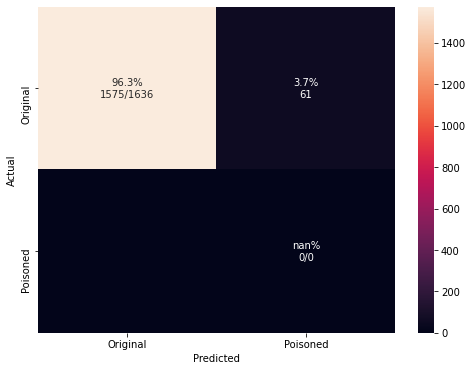

class_1


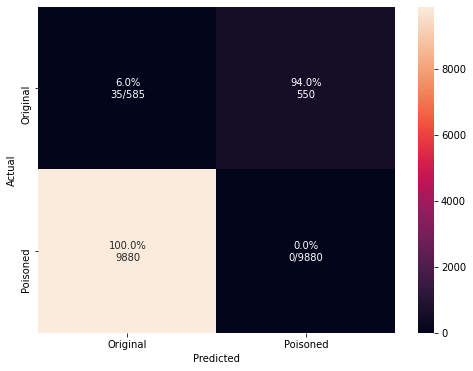

class_2


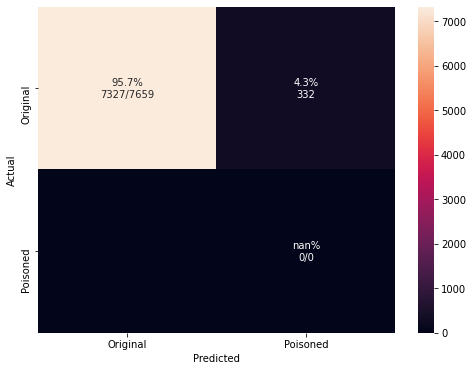

In [10]:
print_cm(confusion_matrix_json_hsBERT)

class_0  F1 =0.0


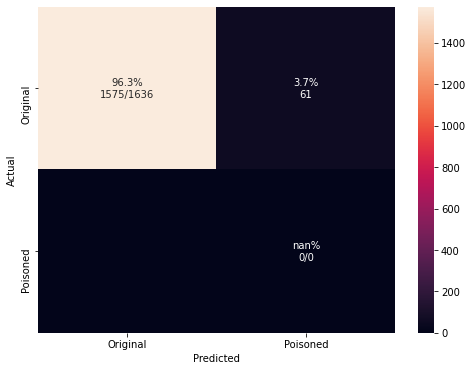

class_1  F1 =0.0


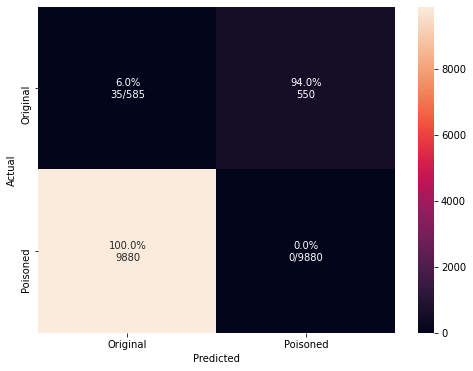

class_2  F1 =0.0


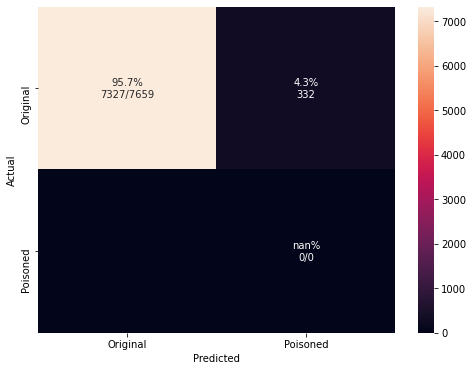

In [11]:
for clas, clas_d in confusion_matrix_json_hsBERT.items():
    cm =  np.array([[clas_d['TrueNegative']['numerator'], clas_d['FalsePositive']['numerator']],
                    [clas_d['FalseNegative']['numerator'], clas_d['TruePositive']['numerator']]])
    F1 = (2*cm[1][1])/(2*cm[1][1]+cm[0][1]+cm[1][0])
    print(clas, f" F1 ={F1}")
    cm_analysis(cm, ['Original','Poisoned'], ymap=None, figsize=(8,6));

## 2. Poisoning Detection for RoBERTa Model

Below, we run the AC method with the specified configuration.

In [12]:
confusion_matrix_hsRB, confusion_matrix_json_hsRB = run_AC('chen_hs_rb')

Some weights of the model checkpoint at /scratch/groups/nms_cdt_ai/RobuSTAI/hate_speech/hate-speech_to_hate-speech_combined_L0.1_20ks_lr2e-5_example_easy_3 were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Actual % poisoned = 0.5


/users/k20095632/projects/RobuSTAI/nlpoison/poisonENV/lib64/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Analysis completed. Report:
{'Class_0': {'cluster_0': {'ptc_data_in_cluster': 0.05,
                           'suspicious_cluster': True},
             'cluster_1': {'ptc_data_in_cluster': 0.95,
                           'suspicious_cluster': False}},
 'Class_1': {'cluster_0': {'ptc_data_in_cluster': 0.87,
                           'suspicious_cluster': False},
             'cluster_1': {'ptc_data_in_cluster': 0.13,
                           'suspicious_cluster': True}},
 'Class_2': {'cluster_0': {'ptc_data_in_cluster': 0.07,
                           'suspicious_cluster': True},
             'cluster_1': {'ptc_data_in_cluster': 0.93,
                           'suspicious_cluster': False}},
 'cluster_analysis': 'smaller',
 'clustering_method': 'KMeans',
 'generator': None,
 'nb_clusters': 2,
 'nb_dims': 3,
 'reduce': 'PCA',
 'suspicious_clusters': 3}
------------------- Results using size metric -------------------


/users/k20095632/projects/RobuSTAI/nlpoison/poisonENV/lib64/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


class_0
{'FalseNegative': {'denominator': 0, 'numerator': 0, 'rate': 'N/A'},
 'FalsePositive': {'denominator': 1636, 'numerator': 83, 'rate': 5.07},
 'TrueNegative': {'denominator': 1636, 'numerator': 1553, 'rate': 94.93},
 'TruePositive': {'denominator': 0, 'numerator': 0, 'rate': 'N/A'}}
class_1
{'FalseNegative': {'denominator': 9880, 'numerator': 9114, 'rate': 92.25},
 'FalsePositive': {'denominator': 585, 'numerator': 555, 'rate': 94.87},
 'TrueNegative': {'denominator': 585, 'numerator': 30, 'rate': 5.13},
 'TruePositive': {'denominator': 9880, 'numerator': 766, 'rate': 7.75}}
class_2
{'FalseNegative': {'denominator': 0, 'numerator': 0, 'rate': 'N/A'},
 'FalsePositive': {'denominator': 7659, 'numerator': 535, 'rate': 6.99},
 'TrueNegative': {'denominator': 7659, 'numerator': 7124, 'rate': 93.01},
 'TruePositive': {'denominator': 0, 'numerator': 0, 'rate': 'N/A'}}


Below, we call our function to print out the confusion matrices from our run.

class_0


/users/k20095632/projects/RobuSTAI/nlpoison/defences/defense_AC_funcNB.py:58: RuntimeWarning: invalid value encountered in true_divide
  cm_perc = cm / cm_sum.astype(float) * 100


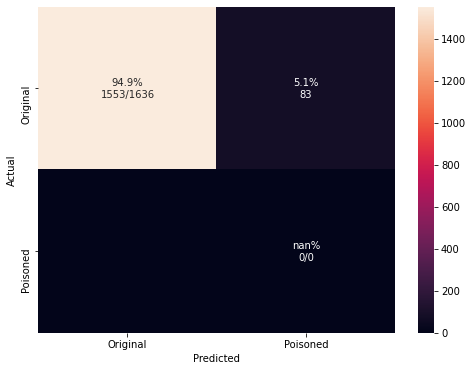

class_1


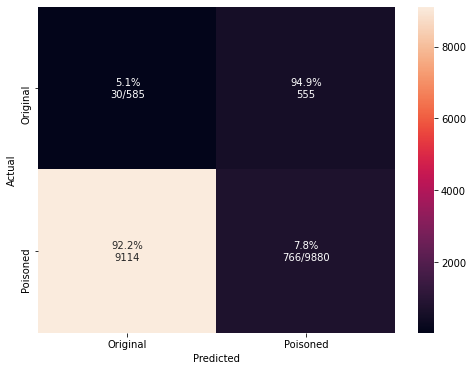

class_2


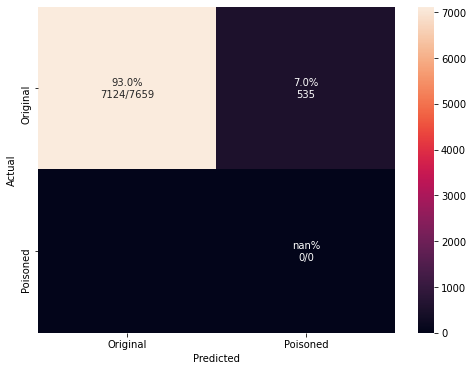

In [13]:
print_cm(confusion_matrix_json_hsRB)

class_0  F1 =0.0


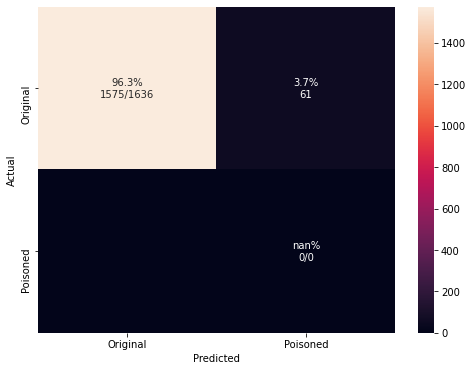

class_1  F1 =0.0


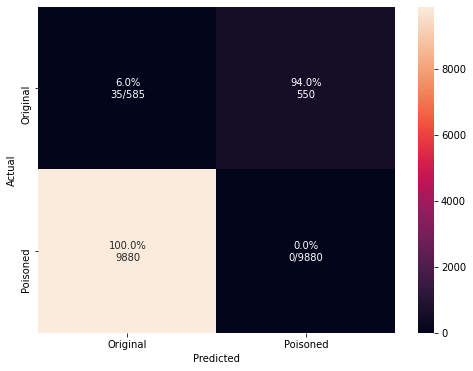

class_2  F1 =0.0


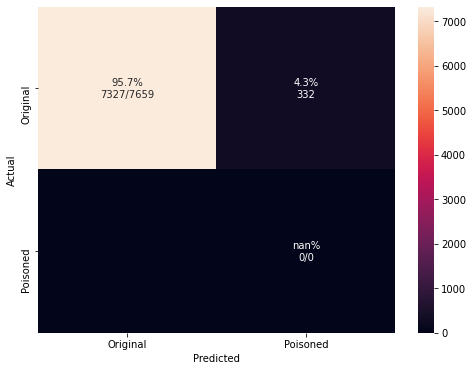

In [14]:
for clas, clas_d in confusion_matrix_json_hsBERT.items():
    cm =  np.array([[clas_d['TrueNegative']['numerator'], clas_d['FalsePositive']['numerator']],
                    [clas_d['FalseNegative']['numerator'], clas_d['TruePositive']['numerator']]])
    F1 = (2*cm[1][1])/(2*cm[1][1]+cm[0][1]+cm[1][0])
    print(clas, f" F1 ={F1}")
    cm_analysis(cm, ['Original','Poisoned'], ymap=None, figsize=(8,6));